In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define your data directories
data_dir = 'C:/Users/luv05/projects/proj_leaf_1/leaf_data'  # Replace with the root directory of your dataset
image_size = (224, 224)
batch_size = 32
num_classes = 12  # Number of classes (types of leaves) in your dataset

In [3]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data will be used for validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # This selects the training subset
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # This selects the validation subset
)

Found 4690 images belonging to 12 classes.
Found 1166 images belonging to 12 classes.


In [4]:
# Define your CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
)

Epoch 1/10
147/147 [==============================] - 269s 2s/step - loss: 1.0286 - accuracy: 0.7198 - val_loss: 0.5559 - val_accuracy: 0.8216
Epoch 2/10
147/147 [==============================] - 288s 2s/step - loss: 0.4379 - accuracy: 0.8507 - val_loss: 0.4926 - val_accuracy: 0.8345
Epoch 3/10
147/147 [==============================] - 290s 2s/step - loss: 0.3509 - accuracy: 0.8874 - val_loss: 0.3999 - val_accuracy: 0.8688
Epoch 4/10
147/147 [==============================] - 271s 2s/step - loss: 0.2747 - accuracy: 0.9085 - val_loss: 0.3858 - val_accuracy: 0.8551
Epoch 5/10
147/147 [==============================] - 270s 2s/step - loss: 0.2418 - accuracy: 0.9241 - val_loss: 0.3891 - val_accuracy: 0.8593
Epoch 6/10
147/147 [==============================] - 456s 3s/step - loss: 0.2290 - accuracy: 0.9269 - val_loss: 0.5045 - val_accuracy: 0.8628
Epoch 7/10
147/147 [==============================] - 324s 2s/step - loss: 0.2271 - accuracy: 0.9303 - val_loss: 0.3624 - val_accuracy: 0.8885

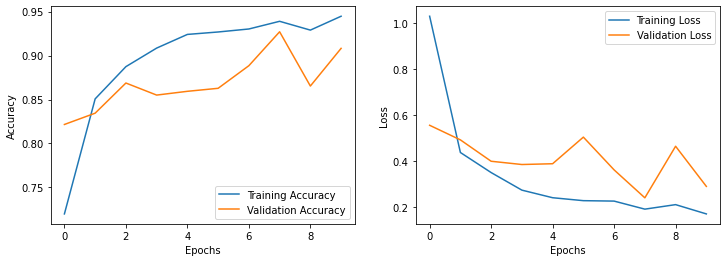

In [7]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
model.save('C:/Users/luv05/projects/proj_leaf_1/CNN_MODEL')

INFO:tensorflow:Assets written to: C:/Users/luv05/projects/proj_leaf_1/CNN_MODEL\assets


In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load the saved model
saved_model_path = 'C:/Users/luv05/projects/proj_leaf_1/CNN_MODEL'  # Replace with the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Create a function to preprocess an image before passing it to the model
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the image

    return img

# Make predictions
image_path = 'C:/Users/luv05/projects/proj_leaf_1/leaf_sample/1.jpg'  # Replace with the path to your test image
preprocessed_image = preprocess_image(image_path)
predictions = loaded_model.predict(preprocessed_image)

# Get the class label of the prediction
class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8', 'Class9', 'Class10', 'Class11', 'Class12', ]  # Replace with your class labels
predicted_class = class_names[np.argmax(predictions)]

print(f"Predicted class: {predicted_class}")


Predicted class: Class5
